# Jeff Sternberg, Intro to Sociology, Laura Senier, Spring 2020



## Using the NYTimes Article API to Create a Corpus on the Coverage of the Opioid Epidemic: 
## An introduction to APIs, JSON, Data Types, and Digital Research Methods

Using the *New York Times* API, we will explore the coverage of the Opioid Epidemic from 2010 to the present, showing you how to use the API to start a query, then show you how we go from unstructrued to structured data, providing examples of what we can do and say with this data. Some of these examples include graphing the number of opioid related article counts by year and tracking and ploting the frequency of key words used to frame and tag each of these articles. 

We will finish by showing you how to take the text from each article and save it as a .txt file to use in further text analysis with Lexos.

### Importing Libraries to Handle APIs

In [1]:
# Import required libraries
from __future__ import division
import requests
import json
import math
import matplotlib.pyplot as plt
import time
import pandas
import csv
import seaborn as sns
%matplotlib inline

## Searching for Stories about Opioids

In [2]:
# set key
key = "Your_Key"

# set base url
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

#set range for our year
year_range = range(2010, 2020)

#create empty list varible
year_tuple = list()
data_list = list()
for year in year_range:
    print(year)

    # set search parameters
    search_params = {"q": "opioid",
                    "api-key": key,
                    "begin_date": str(year)+"0101",  # create year range from the element variable
                    "end_date": str(year)+"1231"}

    # make request
    r = requests.get(base_url, params=search_params)

    # wait 3 seconds for the GET request
    time.sleep(3)

    # convert to a dictionary
    data = json.loads(r.text)
    data_list.append(data)

    # get number of hits
    hits = data['response']['meta']['hits']
    print("number of hits: ", str(hits))
    year_tuple.append(tuple((year, hits)))

2010
number of hits:  39
2011
number of hits:  58
2012
number of hits:  66
2013
number of hits:  74
2014
number of hits:  103
2015
number of hits:  91
2016
number of hits:  282
2017
number of hits:  542
2018
number of hits:  753
2019
number of hits:  687


## Plotting the Number of Articles on Opioids by Year

In [3]:
df_years = pandas.DataFrame(year_tuple, columns = ["year", "count"])
df_years

,year,count
0,2010,39
1,2011,58
2,2012,66
3,2013,74
4,2014,103
5,2015,91
6,2016,282
7,2017,542
8,2018,753
9,2019,687


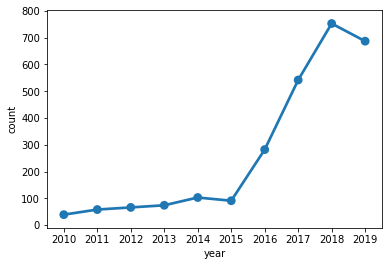

In [4]:
sns.pointplot(x='year', y='count', data = df_years)

## What's in the Data the API gives back to Us?

For each call that we did above, we pulled the first page of queries for each year, meaning that the data we pulled has all of the data for the first ten articles in each year. We have then 100 total articles (not the full amount that was used to create the plot above) with 10 articles per year. 

We could change our original query and code for the NYTimes Article API to pull every page from each year so we had the full population of articles to make our corpus.

### What is in the Data we pulled and what can we do with it?

In [5]:
#Let's look at what is in the first page of the data we scraped from the New York Times, 
#looking at the 10 most relevant articles for our opioids serarch in 2010.

data_list[0]

{'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'_id': 'nyt://article/d163a755-71d8-5fdb-a9e5-55b6560bf2f3',
    'abstract': 'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.',
    'byline': {'organization': None,
     'original': 'By Barry Meier',
     'person': [{'firstname': 'Barry',
       'lastname': 'Meier',
       'middlename': None,
       'organization': '',
       'qualifier': None,
       'rank': 1,
       'role': 'reported',
       'title': None}]},
    'document_type': 'article',
    'headline': {'content_kicker': None,
     'kicker': None,
     'main': 'Narcotic Painkillers May Pose Danger to Elderly Patients, Study Says',
     'name': None,
     'print_headline': 'Narcotic Painkillers, Thought Safer for Elderly Patients, May Pose More Risk, Study Says',
     'seo': None,
     'sub': None},
    'keywords': [{'major': 'N',
      'name': 'subject',
      'rank

In [6]:
#We see different categories represented in this output, the data nested in hierarchical sets of categories
#What categories are in the top level of our hierarchy?

for i in data_list[0]:
    print(i)

status
copyright
response


In [7]:
#If we look into the status category, what data is stored here, what other categories are nested below this?

print(data_list[0]["status"])

OK


In [8]:
#If we look into the copyright category, what data is stored here, what other categories are nested below this?

print(data_list[0]['copyright'])

Copyright (c) 2020 The New York Times Company. All Rights Reserved.


In [9]:
#If we look into the response category, what data is stored here, what other categories are nested below this?

print(data_list[0]['response'])

{'docs': [{'abstract': 'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.', 'web_url': 'https://www.nytimes.com/2010/12/14/health/14drug.html', 'snippet': 'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.', 'lead_paragraph': ' Older patients with arthritis who take narcotic-based drugs to relieve pain face a higher risk of bone fracture, heart attack and death when compared to those taking non-narcotic drugs, according to a government-financed study published Monday.', 'print_section': 'B', 'print_page': '3', 'source': 'The New York Times', 'multimedia': [], 'headline': {'main': 'Narcotic Painkillers May Pose Danger to Elderly Patients, Study Says', 'kicker': None, 'content_kicker': None, 'print_headline': 'Narcotic Painkillers, Thought Safer for Elderly Patients, May Pose More Risk, Study Says', 'name': None, 'seo': None, 'sub': None}, 'keywords': [{'name': 'subject', 'value': 

In [10]:
#It looks like our response category has the meat of data that we'd be interested in, with other subcategories
#clustered beneath it. What are the next level of categories under the response category?


for i in data_list[0]['response']:
    print(i)

docs
meta


In [11]:
#What type of data is held in the meta category? 

print(data_list[0]['response']['meta'])

{'hits': 39, 'offset': 0, 'time': 164}


In [12]:
#What type of data is held in the docs category?

data_list[0]['response']['docs']

[{'_id': 'nyt://article/d163a755-71d8-5fdb-a9e5-55b6560bf2f3',
  'abstract': 'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.',
  'byline': {'organization': None,
   'original': 'By Barry Meier',
   'person': [{'firstname': 'Barry',
     'lastname': 'Meier',
     'middlename': None,
     'organization': '',
     'qualifier': None,
     'rank': 1,
     'role': 'reported',
     'title': None}]},
  'document_type': 'article',
  'headline': {'content_kicker': None,
   'kicker': None,
   'main': 'Narcotic Painkillers May Pose Danger to Elderly Patients, Study Says',
   'name': None,
   'print_headline': 'Narcotic Painkillers, Thought Safer for Elderly Patients, May Pose More Risk, Study Says',
   'seo': None,
   'sub': None},
  'keywords': [{'major': 'N',
    'name': 'subject',
    'rank': 1,
    'value': 'ARTHRITIS AND RHEUMATISM'},
   {'major': 'N', 'name': 'subject', 'rank': 2, 'value': 'Elderly'},
   {'major': 'N',
    'name': 'sub

## Naming Our Articles

Now that we've found out where our article text and metadata is stored, how do we go about organizing and saving this information in an ordered and structured way? 

We can start by naming each of the articles for easier recall access later. We can do this by taking the last name of the author and the yer the article was published and using this as the filename to save the article as.

In [13]:
#We pull out the last name by going into the docs category of the repsonse, calling the first article in 
#our data(the [0]), going into the byline category, further into the person category, and selecting the 
#lastname category, giving us just the last name of the author of this first article.

data_list[0]['response']['docs'][0]['byline']['person'][0]['lastname']

'Meier'

In [14]:
#We pull out the year publsihed categry in a very similar way, going into the docs category of the repsonse, 
#calling the first article in our data(the [0]), calling the pub_date category and taking only the first 4 
#characters of the pub_date leaving us with just the 4-digit year of publication. 

data_list[0]['response']['docs'][0]['pub_date'][0:4]

'2010'

In [15]:
#The above was an exmaple of how we do this for one article. We want to automate the process so we don't have to do it
#manually for each article in our data. This code automates the process and makes a list of these article names as it
#goes through our data pulling out the info above, as well as a sepearte list with the years each article was published.

article_name = list()
year = list()

data_list_iter = range(len(data_list))

for d in data_list_iter:
    article_iter = range((len(data_list[d]['response']['docs'])))

    for a in article_iter:
        try:
            last_name =  str(data_list[d]['response']['docs'][a]['byline']['person'][0]['lastname'])
        except:
            last_name = 'no_last_name_'+str(d)+'_'+str(a)
            
        date = data_list[d]['response']['docs'][a]['pub_date'][0:4]
        year.append(int(date))
        name = last_name+'_'+date
        article_name.append(name)

In [16]:
#Here then we see the content of the list

article_name

['Meier_2010',
 'Zezima_2010',
 'Goodnough_2010',
 'Walter_2010',
 'Romm_2010',
 'Meier_2010',
 'Hevesi_2010',
 'Rabin_2010',
 'no_last_name_0_8_2010',
 'Wilson_2010',
 'Bakalar_2011',
 'Aschwanden_2011',
 'Jackson_2011',
 'Belson_2011',
 'Branch_2011',
 'Branch_2011',
 'Bakalar_2011',
 'Kaplan_2011',
 'Wilson_2011',
 'Szalavitz_2011',
 'Buettner_2012',
 'Meier_2012',
 'Pollack_2012',
 'Grady_2012',
 'Christopher_2012',
 'Chen_2012',
 'Meier_2012',
 'Hartocollis_2012',
 'Cave_2012',
 'Bakalar_2012',
 'Sontag_2013',
 'Meier_2013',
 'Meier_2013',
 'no_last_name_3_3_2013',
 'Meier_2013',
 'Meier_2013',
 'Bakalar_2013',
 'Bakalar_2013',
 'no_last_name_3_8_2013',
 'Tavernise_2013',
 'Frakt_2014',
 'no_last_name_4_1_2014',
 'Bakalar_2014',
 'Miller_2014',
 'McKinley_2014',
 'Thomas_2014',
 'Goodman_2014',
 'Thomas_2014',
 'Tavernise_2014',
 'Rabin_2014',
 'Schwarz_2015',
 'Friedrichsdorf_2015',
 'Bakalar_2015',
 'Brody_2015',
 'Friedman_2015',
 'TIEFENTHÄLER_2015',
 'Harris_2015',
 'Schwarz_

In [17]:
#Let's give this list more order and present it as a table so we can start seeing which articles are in our data along
#with what year they were published. We will be adding more columns and information to this table as we go, including
#the text data we are ultimately interested in.

text_df = pandas.DataFrame(article_name, columns = ["name"])

In [18]:
text_df['year']=year

In [19]:
text_df

,name,year
0,Meier_2010,2010
1,Zezima_2010,2010
2,Goodnough_2010,2010
3,Walter_2010,2010
4,Romm_2010,2010
5,Meier_2010,2010
6,Hevesi_2010,2010
7,Rabin_2010,2010
8,no_last_name_0_8_2010,2010
9,Wilson_2010,2010


## What Keywords are Used to Label and Describe the Articles Present? 

So thus far, we have been able to start parsing through our json file datat to see what it holds, and have begun the process of structuring our data by article to help us progress in our research, starting to build a dataset from raw
and unstructured data.

What else can we find out about each article?

We saw above there was a keyword field that listed how the NYTimes tagged and categorzied this story for content and search. What keywords were used for each article?

In [20]:
#Here, we want to look at which keywords were used for article 1 in our data. If we just pull the keywords field
#then we get our information, though it is still kind of messy.

for i in data_list[0]['response']['docs'][0]['keywords']:
    print(i)

{'name': 'subject', 'value': 'ARTHRITIS AND RHEUMATISM', 'rank': 1, 'major': 'N'}
{'name': 'subject', 'value': 'Elderly', 'rank': 2, 'major': 'N'}
{'name': 'subject', 'value': 'Drugs (Pharmaceuticals)', 'rank': 3, 'major': 'N'}
{'name': 'subject', 'value': 'Pain-Relieving Drugs', 'rank': 4, 'major': 'N'}


In [21]:
#We dive deeper into this output and pull just the first keyword, telling us it's rank of use for this article.

data_list[0]['response']['docs'][0]['keywords'][0]

{'major': 'N',
 'name': 'subject',
 'rank': 1,
 'value': 'ARTHRITIS AND RHEUMATISM'}

In [22]:
#If we just want the keyword, to put in a column in our article table, then we pull the value field, leaving us with 
#just "Arthritis and Rheumatism

data_list[0]['response']['docs'][0]['keywords'][0]['value']

'ARTHRITIS AND RHEUMATISM'

### What Keywords are Represented in Our 100 Articles?

We can then make a list of all the keywords use for each article, automating the process we did above, and pulling each keyword for each article in our list, as well as a count of how many keywords are used in each article.

In [23]:
kw_by_doc = list()
number_of_kw = list()

data_list_iter = range(len(data_list))

for d in data_list_iter:
    article_iter = range((len(data_list[d]['response']['docs'])))

    for a in article_iter:
        doc = data_list[d]['response']['docs'][a]
        keyw_iter = range(len(doc['keywords']))
        keywords = list()
        for k in keyw_iter:
            keywords.append(doc['keywords'][k]['value'])
            
        print("article #",a)
        print(keywords)
        print("Number of Keywords:",len(keywords))
        num_kw = len(keywords)
        number_of_kw.append(num_kw)
        kw_by_doc.append(keywords)

article # 0
['ARTHRITIS AND RHEUMATISM', 'Elderly', 'Drugs (Pharmaceuticals)', 'Pain-Relieving Drugs']
Number of Keywords: 4
article # 1
['DURA AUTOMOTIVE SYSTEMS INCORPORATED', 'Tests and Testing', 'Pain-Relieving Drugs', 'ACCIDENTS AND SAFETY', 'Drugs (Pharmaceuticals)', 'Drug Abuse and Traffic', 'Labor and Jobs']
Number of Keywords: 7
article # 2
['Drug Abuse and Traffic', 'Drugs (Pharmaceuticals)', 'Drug Enforcement Administration', 'Pain-Relieving Drugs']
Number of Keywords: 4
article # 3
['OxyContin (Drug)', 'Pain-Relieving Drugs', 'Elderly', 'Cocaine and Crack Cocaine', 'San Francisco (Calif)', 'Drug Abuse and Traffic']
Number of Keywords: 6
article # 4
['Pain-Relieving Drugs', 'Pain', 'Books and Literature', 'Medicine and Health', 'ANESTHESIA AND ANESTHETICS', 'Thernstrom, Melanie']
Number of Keywords: 6
article # 5
['Doctors', 'Washington (State)', 'Drugs (Pharmaceuticals)', 'Regulation and Deregulation of Industry', 'Pain-Relieving Drugs']
Number of Keywords: 5
article # 6
['

article # 3
['Books and Literature', 'Opioids and Opiates', 'Addiction (Psychology)', 'OxyContin (Drug)']
Number of Keywords: 4
article # 4
['Drug Abuse and Traffic', 'Addiction (Psychology)', 'Opioids and Opiates', 'Heroin', 'West Virginia', 'Drugs (Pharmaceuticals)', 'your-feed-photojournalism']
Number of Keywords: 7
article # 5
['Drug Abuse and Traffic', 'Nine-One-One (911) (Emergency Phone Number)', 'Emergency Medical Treatment', 'Fentanyl', 'Opioids and Opiates', 'Hatton, Scotty', 'Weil, Eric (1968- )', 'Wightman, Scottie', 'ALTON (NH)']
Number of Keywords: 9
article # 6
['Purdue Pharma', 'OxyContin (Drug)', 'Addiction (Psychology)', 'Drug Abuse and Traffic', 'Opioids and Opiates', 'Pain', 'Drugs (Pharmaceuticals)', 'Mental Health and Disorders']
Number of Keywords: 8
article # 7
['Opioids and Opiates', 'Michigan', 'Frauds and Swindling', 'Doctors', 'Health Insurance and Managed Care', 'OxyContin (Drug)', 'Medicaid', 'Medicare', 'Bothra, Rajendra', 'Backos, Eric', 'Edu, Ganiu', 'L

In [24]:
kw_by_doc

[['ARTHRITIS AND RHEUMATISM',
  'Elderly',
  'Drugs (Pharmaceuticals)',
  'Pain-Relieving Drugs'],
 ['DURA AUTOMOTIVE SYSTEMS INCORPORATED',
  'Tests and Testing',
  'Pain-Relieving Drugs',
  'ACCIDENTS AND SAFETY',
  'Drugs (Pharmaceuticals)',
  'Drug Abuse and Traffic',
  'Labor and Jobs'],
 ['Drug Abuse and Traffic',
  'Drugs (Pharmaceuticals)',
  'Drug Enforcement Administration',
  'Pain-Relieving Drugs'],
 ['OxyContin (Drug)',
  'Pain-Relieving Drugs',
  'Elderly',
  'Cocaine and Crack Cocaine',
  'San Francisco (Calif)',
  'Drug Abuse and Traffic'],
 ['Pain-Relieving Drugs',
  'Pain',
  'Books and Literature',
  'Medicine and Health',
  'ANESTHESIA AND ANESTHETICS',
  'Thernstrom, Melanie'],
 ['Doctors',
  'Washington (State)',
  'Drugs (Pharmaceuticals)',
  'Regulation and Deregulation of Industry',
  'Pain-Relieving Drugs'],
 ['Medicine and Health', 'Drugs (Pharmaceuticals)', 'Deaths (Obituaries)'],
 ['Pain',
  'Drug Abuse and Traffic',
  'Medicine and Health',
  'Emergency Me

In [25]:
#Let's add the lists of keywords used in each article, as well as the number of keywords used in each article to our
#article table

text_df['key_words']=kw_by_doc
text_df['number_of_key_words']=number_of_kw

In [26]:
text_df

,name,year,key_words,number_of_key_words
0,Meier_2010,2010,"[ARTHRITIS AND RHEUMATISM, Elderly, Drugs (Pha...",4
1,Zezima_2010,2010,"[DURA AUTOMOTIVE SYSTEMS INCORPORATED, Tests a...",7
2,Goodnough_2010,2010,"[Drug Abuse and Traffic, Drugs (Pharmaceutical...",4
3,Walter_2010,2010,"[OxyContin (Drug), Pain-Relieving Drugs, Elder...",6
4,Romm_2010,2010,"[Pain-Relieving Drugs, Pain, Books and Literat...",6
5,Meier_2010,2010,"[Doctors, Washington (State), Drugs (Pharmaceu...",5
6,Hevesi_2010,2010,"[Medicine and Health, Drugs (Pharmaceuticals),...",3
7,Rabin_2010,2010,"[Pain, Drug Abuse and Traffic, Medicine and He...",4
8,no_last_name_0_8_2010,2010,"[Fibromyalgia, Medicine and Health, Pain, Pain...",4
9,Wilson_2010,2010,[],0


### What can we do with this Keyword Information?

One quesiton we can ask is: How Many Times was Each Keyword used in Our Sample?

In [27]:
#Here, we write a command that counts the usage of each keyword across all our articles

df = pandas.Series(sum([item for item in text_df.key_words], [])).value_counts()

In [28]:
#Let's turn it into a table of keywords by their frequency of use

df_1 = df.to_frame()
df_1

,0
Pain-Relieving Drugs,82
Drug Abuse and Traffic,55
Drugs (Pharmaceuticals),38
Opioids and Opiates,20
Addiction (Psychology),19
Food and Drug Administration,15
Pain,14
Heroin,12
OxyContin (Drug),10
Medicine and Health,9


In [29]:
#What does our distribution look like for keyword counts? It looks like there are 306 total uses of keywords in our 
#100 articles, that the maximum amont a keyword was used was 82 times, that our mean number of times a keyword ws used was 
#2.38 times, and that 75% of our frequency usage happens with keywords used more than 2 times.


df_1.describe()

,0
count,306.000000
mean,2.375817
std,6.284454
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,82.000000


In [30]:
#The frequency data as it stands is messy and skewed right, let's only look at keywords with high frequencies of use
#for comparisons, so only those keywords with over 2 uses, representing 75% of our data

df_for_plot = df_1[df_1[0]>2]

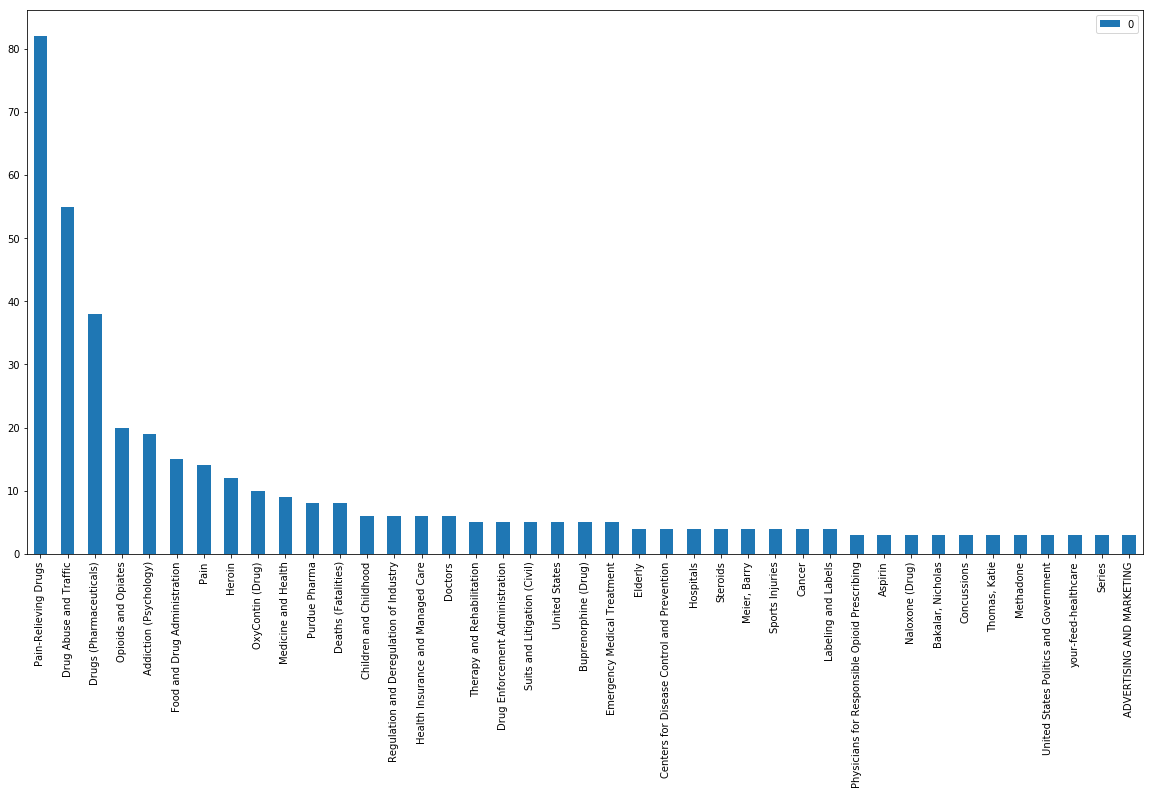

In [31]:
#Let's plot the frequencies of keyword use on a bar-graph. From this we can begin to think of how stories relating 
#to opioids are categorized, tagged, and pitched by the NYTimes.

df_for_plot.plot(kind='bar', figsize=(20,10))

## Gathering Text to Make a Corpus for Text Analysis

We've shown a little bit of what you can do with the meta-data included in the data we scraped from the NYTImes API for each article. You could parse around this output datat for a bot and find other bits of data that would be interesting, however, when we are looking at News Paper articles, we are often most interested in the content of those articles, what are they saying?

Being that we want to conduct a text analysis of the content of these articles, we must first gather this written content and collect it in a structured form for analysis, which means finding the relevant text data and getting it ready to save as its own text file.

In [32]:
#We start to do this by looking again at the response and document fields in our data. Where is the text of 
#interest? It looks like it might be contained in the abstract, lead paragraph, and snippet. 

data_list[0]['response']['docs'][0]

{'_id': 'nyt://article/d163a755-71d8-5fdb-a9e5-55b6560bf2f3',
 'abstract': 'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.',
 'byline': {'organization': None,
  'original': 'By Barry Meier',
  'person': [{'firstname': 'Barry',
    'lastname': 'Meier',
    'middlename': None,
    'organization': '',
    'qualifier': None,
    'rank': 1,
    'role': 'reported',
    'title': None}]},
 'document_type': 'article',
 'headline': {'content_kicker': None,
  'kicker': None,
  'main': 'Narcotic Painkillers May Pose Danger to Elderly Patients, Study Says',
  'name': None,
  'print_headline': 'Narcotic Painkillers, Thought Safer for Elderly Patients, May Pose More Risk, Study Says',
  'seo': None,
  'sub': None},
 'keywords': [{'major': 'N',
   'name': 'subject',
   'rank': 1,
   'value': 'ARTHRITIS AND RHEUMATISM'},
  {'major': 'N', 'name': 'subject', 'rank': 2, 'value': 'Elderly'},
  {'major': 'N',
   'name': 'subject',
   'rank': 3,
   'va

In [33]:
#What text is held in the abstract?

data_list[0]['response']['docs'][0]['abstract']

'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.'

In [34]:
#What text is held in the lead paragraph?

data_list[0]['response']['docs'][0]['lead_paragraph']

' Older patients with arthritis who take narcotic-based drugs to relieve pain face a higher risk of bone fracture, heart attack and death when compared to those taking non-narcotic drugs, according to a government-financed study published Monday.'

In [35]:
#What text is held in the snippet? 

data_list[0]['response']['docs'][0]['snippet']

'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.'

A limitation of the article search API and the data we collected is that the full text of the article is not available, only a few text fields such as the abstract and snippet summarizing the article, and the lead paragraph of article itself.

In our above example, the abstract and snippet are the same, but this is not the case with every article. For our purposes, let's just collect these three fields, and put them together into one text document for each article.

In [36]:
#Let's automate the collection of these three text fields, and merge them into one text, make a list of these texts,
#and add them to our article table.

text_by_article = list()

data_list_iter = range(len(data_list))

for d in data_list_iter:
    article_iter = range((len(data_list[d]['response']['docs'])))

    for a in article_iter:
        abstract = data_list[d]['response']['docs'][a]['abstract']
        lead_paragraph = data_list[d]['response']['docs'][a]['lead_paragraph']
        snippet = data_list[d]['response']['docs'][a]['snippet']
        text = abstract+lead_paragraph+snippet
        text_by_article.append(text)
        
       

In [37]:
#Here we look at the text collected for each article

text_by_article

['A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs. Older patients with arthritis who take narcotic-based drugs to relieve pain face a higher risk of bone fracture, heart attack and death when compared to those taking non-narcotic drugs, according to a government-financed study published Monday.A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.',
 'Workplace testing is drawing complaints from employees who say they should not be fired for taking legal drugs.LAWRENCEBURG, Tenn. \x97 The news, delivered in a phone call, left Sue Bates aghast: she was losing her job of 22 years after testing positive for a legally prescribed drug. Workplace testing is drawing complaints from employees who say they should not be fired for taking legal drugs.',
 'Drug users are breaking into people’s homes in search of prescription painkillers and other medications.BOSTON \x97 Police departments have c

In [38]:
#We take the text collected for each article and add it to our article table

text_df['text']=text_by_article

In [39]:
text_df

,name,year,key_words,number_of_key_words,text
0,Meier_2010,2010,"[ARTHRITIS AND RHEUMATISM, Elderly, Drugs (Pha...",4,"A review cited a higher risk of bone fracture,..."
1,Zezima_2010,2010,"[DURA AUTOMOTIVE SYSTEMS INCORPORATED, Tests a...",7,Workplace testing is drawing complaints from e...
2,Goodnough_2010,2010,"[Drug Abuse and Traffic, Drugs (Pharmaceutical...",4,Drug users are breaking into people’s homes in...
3,Walter_2010,2010,"[OxyContin (Drug), Pain-Relieving Drugs, Elder...",6,San Francisco police officers say they are see...
4,Romm_2010,2010,"[Pain-Relieving Drugs, Pain, Books and Literat...",6,"An expansive mix of medical reportage, history..."
5,Meier_2010,2010,"[Doctors, Washington (State), Drugs (Pharmaceu...",5,Regulators in Washington State are attempting ...
6,Hevesi_2010,2010,"[Medicine and Health, Drugs (Pharmaceuticals),...",3,Mr. Lotsof’s belief that ibogaine could cure a...
7,Rabin_2010,2010,"[Pain, Drug Abuse and Traffic, Medicine and He...",4,Emergency room visits for nonmedical use of pr...
8,no_last_name_0_8_2010,2010,"[Fibromyalgia, Medicine and Health, Pain, Pain...",4,"Mysterious pain, doubting doctors, depression,..."
9,Wilson_2010,2010,[],0,The pain killer and related drugs can cause fa...


## Saving our Corpus as Text Files for Further Analysis

Now that we have the names and text for each article in one place, let's take the text data and save each article's text data as a seperate .txt file.

In [40]:
#Here we pull out only the filename and text columns from the table above.

subset = text_df[['name','text']]

In [41]:
#Here we make a list of tuples, which we can think of as a list of two elements joined, in this case the first element 
#being the article name and the second being its corresponding text.

tuples = [tuple(x) for x in subset.values]

In [42]:
tuples

[('Meier_2010',
  'A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs. Older patients with arthritis who take narcotic-based drugs to relieve pain face a higher risk of bone fracture, heart attack and death when compared to those taking non-narcotic drugs, according to a government-financed study published Monday.A review cited a higher risk of bone fracture, heart attack and death with use of narcotic-based drugs.'),
 ('Zezima_2010',
  'Workplace testing is drawing complaints from employees who say they should not be fired for taking legal drugs.LAWRENCEBURG, Tenn. \x97 The news, delivered in a phone call, left Sue Bates aghast: she was losing her job of 22 years after testing positive for a legally prescribed drug. Workplace testing is drawing complaints from employees who say they should not be fired for taking legal drugs.'),
 ('Goodnough_2010',
  'Drug users are breaking into people’s homes in search of prescription painkillers a

In [44]:
#Here we move through our list of tuples, telling the computer to open a new file, take the first element filename 
#in the tuple to name it as, and then take the second element (the text) in the tuple and write it into the newly
#created file.

#This code works through the list and saves each article as a sepearte file in the folder where this jupyter notebook
#is located. This is how the corpus and text files you were sent via email and that are available on the github page
#were created.

for tup in tuples:
    f=open(str(tup[0])+".txt","w+")
    f.write(str(tup[1]))
    f.close()